In [70]:
import numpy as np
import pandas as pd

from loguru import logger

In [71]:
def read_csv(path: str) -> pd.DataFrame:
    file = pd.read_csv(path)
    return file

TRAIN_SET = read_csv("./train.csv")
TEST_SET = read_csv("./test.csv")
TRAIN_SET.head()

,id,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


In [72]:
dataset = TRAIN_SET
dataset.emotions.value_counts()

joy         412
sadness     351
anger       161
fear        129
love        106
surprise     41
Name: emotions, dtype: int64

In [73]:
dataset = dataset.sort_values("id")
dataset.head()

,id,text,emotions
37,79,article published,joy
669,90,at end of school function to celebrate leaving...,sadness
308,149,football was a very big deal at my high school,joy
743,181,i almost feel your touch that caress so gentle...,love
166,209,held under water by a large wave and thought i...,fear


In [74]:
dataset_dup = dataset.duplicated(subset=["id"])
index = np.where(dataset_dup==True)
index

(array([ 69, 156, 700, 705, 825]),)

In [75]:
dataset = dataset.drop(index[0])

In [76]:
len(dataset)

1195

In [77]:
# dataset_js = [
#     {
#         "id": 27383,
#         "text": "i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here",
#         "emotion": "sadness"
#     },
#     {
#         "id": 110083,
#         "text": "im alone i feel awful	",
#         "emotion": "sadness"
#     }
# ]
# # 
# dataset = dataset_js
# texts = [entry['text'] for entry in dataset_js]
# emotions = [entry['emotion'] for entry in dataset_js]
# texts, emotions

In [78]:
# emotion_set = set(emotions)
# emotion_to_int = {emotion: i for i, emotion in enumerate(emotion_set)}
# int_to_emotion = {i: emotion for i, emotion in enumerate(emotion_set)}
# emotion_to_int, int_to_emotion

In [79]:
import nltk
from nltk.corpus import brown
nltk.download()

KeyboardInterrupt: 

In [ ]:
word2vec = {}
word_set = {}
word_all = []
idx = 0
for dataset in (TRAIN_SET, TEST_SET):
    for text in dataset.text:
        words = text.split()
        for word in words:
            if word not in word2vec:
                word_all.append(word)
                word2vec[word] = idx
                idx += 1
    word_set = set(word_all)
    # logger.debug(idx)
logger.info(len(word2vec))
# logger.info(len(word_set))
    # print(text)
    # break

2023-02-13 14:53:00.609 | INFO     | __main__:<module>:15 - 4895


In [ ]:
text_features_train = []
for text in TRAIN_SET.text:
    features = [0] * len(word2vec)
    words = text.split()
    for word in words:
        features[word2vec[word]] = 1
    text_features_train.append(features)
logger.info(len(text_features_train[0]))


2023-02-13 15:09:05.257 | INFO     | __main__:<module>:8 - 4895
2023-02-13 15:09:05.259 | INFO     | __main__:<module>:9 - 1200


In [ ]:
text_features_test = []
for text in TEST_SET.text:
    features = [0] * len(word2vec)
    words = text.split()
    for word in words:
        features[word2vec[word]] = 1
    text_features_test.append(features)
logger.info(len(text_features_test[0]))
logger.info(len(text_features_test))

2023-02-13 15:09:05.904 | INFO     | __main__:<module>:8 - 4895
2023-02-13 15:09:05.905 | INFO     | __main__:<module>:9 - 800


In [ ]:
emotions = [_ for _ in TRAIN_SET.emotions]
# emotions_test = [_ for _ in TEST_SET.emotions]

# emotion_set = set(emotions)
emotion_set = set(emotions)

emotion_to_int = {emotion: i for i, emotion in enumerate(emotion_set)}
int_to_emotion = {i: emotion for i, emotion in enumerate(emotion_set)}

In [ ]:
emotions = [emotion_to_int[emotion] for emotion in emotions]
train_targets = np.zeros((len(emotions), len(emotion_set)))
for i, emotion in enumerate(emotions):
    train_targets[i, emotion] = 1

In [ ]:
np.array(text_features_train).shape

(1200, 4895)

In [ ]:
weights = np.zeros((len(word2vec), len(emotion_set)))
learning_rate = 0.01
num_epochs = 100
for epoch in range(num_epochs):
    scores = np.dot(np.array(text_features_train), weights)
    predictions = 1 / (1 + np.exp(-scores))
    # logger.debug(np.array(predictions).shape)
    # logger.debug(np.array(train_targets).shape)
    error = train_targets - predictions
    gradient = np.dot(np.array(text_features_train).T, error)
    weights += learning_rate * gradient
    logger.info(f"Epoch = {epoch}")

# Predict emotions for the test data
scores = np.dot(text_features_test, weights)
predictions = 1 / (1 + np.exp(-scores))
predictions = np.round(predictions)
predicted_emotion = int_to_emotion[np.argmax(predictions[0])]

2023-02-13 15:12:26.809 | INFO     | __main__:<module>:12 - Epoch = 0
2023-02-13 15:12:27.490 | INFO     | __main__:<module>:12 - Epoch = 1
2023-02-13 15:12:28.124 | INFO     | __main__:<module>:12 - Epoch = 2
2023-02-13 15:12:28.764 | INFO     | __main__:<module>:12 - Epoch = 3
2023-02-13 15:12:29.396 | INFO     | __main__:<module>:12 - Epoch = 4
2023-02-13 15:12:30.028 | INFO     | __main__:<module>:12 - Epoch = 5
2023-02-13 15:12:30.669 | INFO     | __main__:<module>:12 - Epoch = 6
2023-02-13 15:12:31.312 | INFO     | __main__:<module>:12 - Epoch = 7
2023-02-13 15:12:31.951 | INFO     | __main__:<module>:12 - Epoch = 8
2023-02-13 15:12:32.584 | INFO     | __main__:<module>:12 - Epoch = 9
2023-02-13 15:12:33.215 | INFO     | __main__:<module>:12 - Epoch = 10
2023-02-13 15:12:33.844 | INFO     | __main__:<module>:12 - Epoch = 11
2023-02-13 15:12:34.460 | INFO     | __main__:<module>:12 - Epoch = 12
2023-02-13 15:12:35.123 | INFO     | __main__:<module>:12 - Epoch = 13
2023-02-13 15:12

In [ ]:
pred_emotion = []

scores = np.dot(text_features_test, weights)
predictions = 1 / (1 + np.exp(-scores))
# logger.debug(predictions)
# predictions = np.ones(predictions.shape) * np.argmax(predictions, axis=1)
# len(np.argmax(predictions, axis=1))
pred = np.zeros(predictions.shape)
for idx in range(pred.shape[0]):
    # logger.debug(np.argmax(predictions, axis=1)[idx])
    pred[idx][np.argmax(predictions, axis=1)[idx]] = 1

for idx in range(pred.shape[0]):
    # logger.debug(np.where(pred[idx]==1))
    
    # logger.debug(int_to_emotion[np.where(pred[idx]==1)[0][0]])
    pred_emotion.append(int_to_emotion[np.where(pred[idx]==1)[0][0]])
# predictions = np.argmax(predictions)
# predicted_emotion = int_to_emotion[np.argmax(predictions[0])]


In [ ]:
dataset['emotions'] = pred_emotion
dataset.to_csv("./test_lg.csv")

In [ ]:
dataset

,id,text,emotions
0,139312,ive been feeling more optimistic this week tha...,sadness
1,110362,i suppose i was feeling adventurous and volunt...,joy
2,45691,i feel like when a cycle comes i get all depre...,sadness
3,958,when confronted and in my opinion hassled by t...,anger
4,33882,i seldom feel shaky mid run,fear
...,...,...,...
795,566,that was what i felt when i was finally accept...,joy
796,36236,i take every day as it comes i m just focussin...,sadness
797,76229,i just suddenly feel that everything was fake,sadness
798,131640,im feeling more eager than ever to claw back w...,joy


In [ ]:
def sigmoid(x: float):
    # Logistic regression function (Sigmoid)
    output = 1 / (1 + np.exp(-x))
    return output


def read_csv(path: str) -> pd.DataFrame:
    file = pd.read_csv(path)
    return file

In [104]:
def data_cleaning(dataset: pd.DataFrame) -> None:
    '''
        Clean the duplicated entries
    '''
    dataset = dataset.sort_values("id")
    dataset_dup = dataset.duplicated(subset=["id"])
    index = np.where(dataset_dup==True)
    # logger.debug(dataset.head())
    dataset = dataset.drop(index[0])
    # logger.debug(dataset.head())
    dataset = dataset.sample(frac=1)
    return dataset

In [105]:
def data_loading(epoch, num_epochs):
    # Load raw dataset
    TRAIN_PATH = "./train.csv"
    TEST_PATH = "./test.csv"
    train_set = read_csv(TRAIN_PATH)
    test_set = read_csv(TEST_PATH)
    
    # data cleaning
    train_set = data_cleaning(train_set)
    test_set = data_cleaning(test_set)
    
    # logger.info(f"After data cleaning, len(train_set) is {len(train_set)}, len(test_set) is {len(test_set)}")

    # Cross validation
    # logger.debug(train_set)
    df_shuffle = train_set.copy()
    # logger.debug(df_shuffle)
    # logger.info(len(df_shuffle))
    df_size = len(df_shuffle)
    idx_split_left = df_size//num_epochs * (epoch)
    idx_split_right = df_size//num_epochs * (epoch+1)
    train_set = pd.concat([df_shuffle.iloc[:idx_split_left], df_shuffle.iloc[idx_split_right:]])
    val_set = df_shuffle.iloc[idx_split_left:idx_split_right]
    return train_set, val_set, test_set

In [106]:
num_epochs = 10
for epoch in range(num_epochs):
    train_set, val_set, test_set = data_loading(epoch, num_epochs)
    logger.debug(df_shuffle)
    break
    # logger.debug(f"{len(train_set)}, {len(val_set)}, {len(test_set)}")

2023-02-28 23:45:36.291 | DEBUG    | __main__:<module>:4 -           id                                               text  emotions
601     3021                        i feel a lil dazed actually  surprise
557   121857  i was rusty but i feel like i flowed ok for mo...       joy
994    97315  i used to think that i was protecting people b...   sadness
1185    7295  i feel weird working out in front of my family...  surprise
463    12560  i can post questions or comments and then sche...   sadness
...      ...                                                ...       ...
12     98659  i mean is on this stupid trip of making the gr...       joy
57     66949  i had my week appointment yesterday and left f...   sadness
1068  109114  i still feel anything but strong but i am also...       joy
795    77413  i know how you are feeling that you feel hopel...   sadness
1186   18552         i continue to feel terrific thanks so much       joy

[1195 rows x 3 columns]


In [107]:
train_set

,id,text,emotions
138,12530,i feel like the puppets are more of an obstacl...,love
116,113942,i took was blurry which kind of captures my fe...,joy
38,33835,i see things so clearly and with so much depth...,fear
435,33801,i have achieved very little but somehow for a ...,anger
240,120714,ive made and provided that someone would under...,sadness
...,...,...,...
814,10443,i read two of the books from my march tbr stac...,surprise
733,3997,i am able because he wants to make the individ...,joy
381,105550,i will even feel highly disturbed because i am...,sadness
1150,19608,i feel skeptical about small accessories,fear


In [108]:
def feature_rep(train_set, val_set, test_set):
    # Create feature representations for data
    word2vec = {}
    word_set = {}
    word_all = []
    idx = 0
    # logger.debug(train_set)
    for dataset in (train_set, val_set, test_set):
        for text in dataset.text:
            words = text.split()
            for word in words:
                if word not in word2vec:
                    word_all.append(word)
                    word2vec[word] = idx
                    idx += 1
        word_set = set(word_all)
        # logger.debug(idx)
    # logger.info(len(word2vec))
    # logger.info(len(word_set))
        # print(text)
        # break
    return word2vec


def text_features(dataset, embedding):
    text_features = []
    for text in dataset.text:
        features = [0] * len(embedding)
        words = text.split()
        for word in words:
            features[embedding[word]] = 1
        text_features.append(features)
    # logger.info(len(text_features[0]))
    # logger.info(len(text_features))
    return text_features

In [152]:
def softmax(x):
      ex = np.exp(x - np.max(x))
      return ex/ex.sum()

In [110]:
def pre_processing(train_set: pd.DataFrame, val_set: pd.DataFrame, test_set: pd.DataFrame):
    
    embedding = feature_rep(train_set, val_set, test_set)
    # Create trianing and testing inputs
    text_features_train = text_features(train_set, embedding)
    text_features_val = text_features(val_set, embedding)
    text_features_test = text_features(test_set, embedding)
    
    # Create labels
    emotions_train = [_ for _ in train_set.emotions]
    emotions_val = [_ for _ in val_set.emotions]

    emotion_set = set(emotions_train)

    emotion2int = {emotion: i for i, emotion in enumerate(emotion_set)}
    int2emotion = {i: emotion for i, emotion in enumerate(emotion_set)}
    
    emotions_train = [emotion2int[emotion] for emotion in emotions_train]
    emotions_val = [emotion2int[emotion] for emotion in emotions_val]
    train_targets = np.zeros((len(emotions_train), len(emotion_set)))
    val_targets = np.zeros((len(emotions_val), len(emotion_set)))
    for i, emotion in enumerate(emotions_train):
        train_targets[i, emotion] = 1
    for i, emotion in enumerate(emotions_val):
        val_targets[i, emotion] = 1

    return embedding, text_features_train, text_features_val, text_features_test,\
        emotion_set, train_targets, val_targets, emotion2int, int2emotion


def post_processing(test_set, pred_emotions):
    output = test_set.copy()
    output['emotions'] = pred_emotions
    output.to_csv("./test_lr.csv")
    return output

In [189]:
TRAIN_PATH = "./train.csv"
TEST_PATH = "./test.csv"
train_set = read_csv(TRAIN_PATH)
test_set = read_csv(TEST_PATH)
val_set = read_csv(TRAIN_PATH)
train_set = data_cleaning(train_set)
val_set = data_cleaning(val_set)
test_set = data_cleaning(test_set)
embedding, _, _, text_features_test,\
        emotion_set, _, _, emotion2int, int2emotion = pre_processing(train_set, val_set, test_set)
# your logistic regression 

learning_rate = 0.001
num_epochs = 150
reg_lambda = 0.0001
iters = 5

errors_train = []
errors_val = []

# weights = np.zeros((len(embedding), len(emotion_set)))
best_score = 0
score_arr = []
for iter_num in range(iters):
  train_set, val_set, test_set = data_loading(iter_num, iters)
  _, text_features_train, text_features_val, _,\
        _, train_targets, val_targets, _, _ = pre_processing(train_set, val_set, test_set)
  weights = np.zeros((len(embedding), len(emotion_set)))
  scores = []
  for epoch in range(num_epochs):
      # Cross validation
      
      # text_features_train = text_features(train_set, embedding)
      # text_features_val = text_features(val_set, embedding)
      # text_features_test = text_features(test_set, embedding)


      output = np.dot(np.array(text_features_train), weights)
      # Logistic regression function (Sigmoid)
      predictions = sigmoid(output)
      # logger.debug(np.array(predictions).shape)
      # logger.debug(np.array(train_targets).shape)
      error = np.square(train_targets - predictions)
      errors_train.append(error)
      gradient = (1/len(train_targets)) * np.dot(np.array(text_features_train).T, error) + reg_lambda * weights
      weights += learning_rate * gradient
      
          
      # evaluation on val_set
      pred_val = sigmoid(np.dot(np.array(text_features_val), weights))
      error_val = np.sum(np.abs(val_targets - pred_val))
      # logger.debug(pred_val.shape)
      # logger.debug(val_targets.shape)
      # largest_idx = np.argmax(pred_val)
      # pred = np.eye(pred_val.shape[1])[np.argmax(pred_val, axis=1)]
      # logger.debug(pred)
      # pred[largest_idx] = 1
      errors_val.append(error_val)
      
      predictions = sigmoid(pred_val)
      # predictions = 1 / (1 + np.exp(-pred_val))
      # logger.debug(predictions)
      largest_idx = np.argmax(predictions, axis=1)
      # logger.debug(largest_idx)
      val_pred = np.eye(predictions.shape[1])[largest_idx]
      # logger.debug(np.argmax(val_pred))
      predicted_emotions = []
      for pred_emotion in np.argmax(val_pred, axis=1):      
        predicted_emotions.append(int2emotion[pred_emotion])

      val_emotions = []
      for val_emotion in np.argmax(val_targets, axis=1):
        val_emotions.append(int2emotion[val_emotion])
      # val_emotions = int2emotion[np.argmax(val_targets, axis=1)]
      # logger.debug(predicted_emotions)
      # logger.debug(val_emotions)
      count = 0
      for i in range(len(predicted_emotions)):
        if predicted_emotions[i] == val_emotions[i]:
            count += 1
      
      score = count / len(val_targets)
      scores.append(score)
      # if score > 0:
          # logger.debug(predicted_emotion)
      logger.info(f"Epoch {epoch}: Accuracy = {score * 100:.2f}%")
      # break
  if score == 0 or score > best_score:
    best_weights = weights
    best_score = score
  score_arr.append(scores)
  logger.info(f"Best Accuracy = {best_score * 100:.2f}%")

    # break
# logger.debug(errors_train)
# logger.debug(errors_val)

KeyboardInterrupt: 

In [187]:
pred_test = sigmoid(np.dot(np.array(text_features_test), best_weights))

predictions = sigmoid(pred_test)
largest_idx = np.argmax(predictions, axis=1)
# logger.debug(largest_idx)
test_pred = np.eye(predictions.shape[1])[largest_idx]
# logger.debug(np.argmax(val_pred))
predicted_emotions = []
for pred_emotion in np.argmax(test_pred, axis=1):      
    predicted_emotions.append(int2emotion[pred_emotion])

test_set['emotions'] = predicted_emotions
test_set.to_csv("./test_lg.csv")

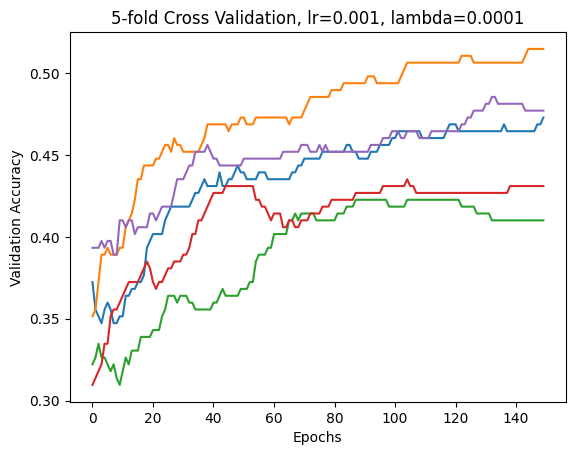

In [184]:
# learning_rate = 0.001
# num_epochs = 150
# reg_lambda = 0.0001
# iters = 5
import matplotlib.pyplot as plt
for scores in score_arr:
    plt.plot(np.arange(len(scores)), scores)
    plt.title(f"{iters}-fold Cross Validation, lr={learning_rate}, lambda={reg_lambda}")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.savefig(f"LR_{iters}-fold Cross Validation, lr={learning_rate}, lambda={reg_lambda}.png")

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

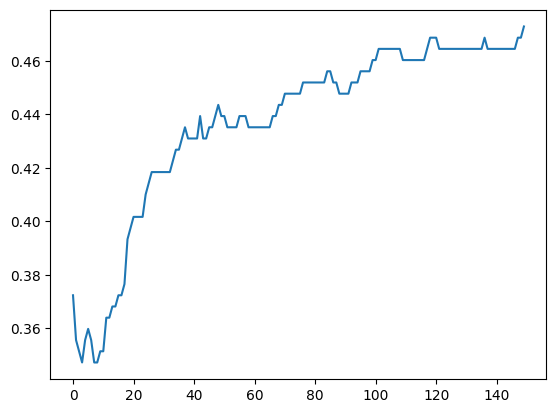

In [179]:
# learning_rate = 0.001
# num_epochs = 50
# reg_lambda = 0.01
# iters = 4
import matplotlib.pyplot as plt
for scores in score_arr:
    plt.plot(np.arange(len(scores)), scores)